# 衡量回归算法的标准

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data.shape

(506, 13)

In [4]:
target.shape

(506,)

In [5]:
x = data[:, 5]

In [6]:
x

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [7]:
x.shape

(506,)

In [8]:
y = target 

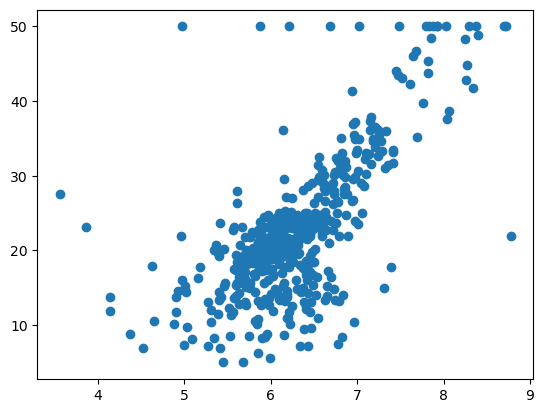

In [9]:
plt.scatter(x, y)
plt.show()

In [10]:
np.max(y) #最上面的一行50，是设置调查问卷时，设置的最大值，比如房产价格>=50为一个选项。

50.0

In [11]:
x = x[y < 50]
y = y[y < 50]

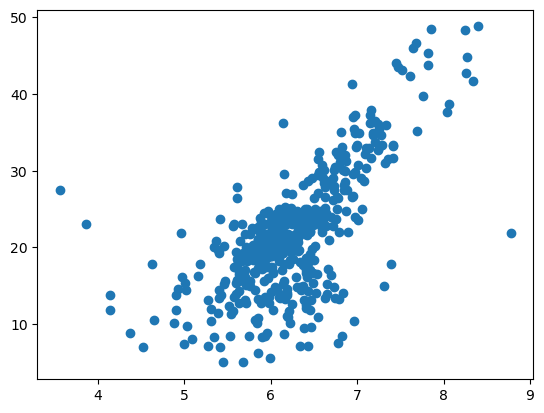

In [12]:
plt.scatter(x, y)
plt.show()

 ## 使用简单线性回归

In [13]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [14]:
x_train.shape

(392,)

In [15]:
x_test.shape

(98,)

In [16]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [17]:
reg2 = SimpleLinearRegression2()

In [18]:
reg2.fit(x_train, y_train)

SimpleLinearRegression2()

In [19]:
reg2.a_

7.860854356268959

In [20]:
reg2.b_

-27.459342806705564

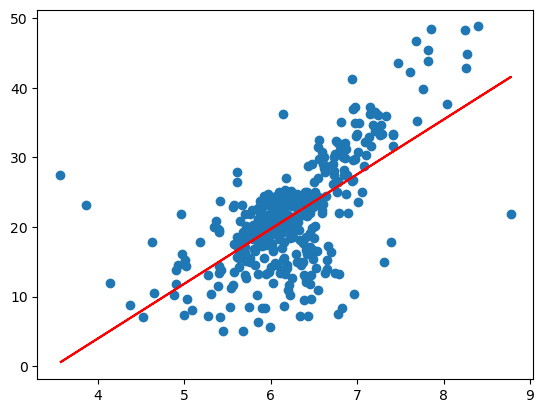

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg2.predict(x_train), color='red')
plt.show() 

In [22]:
 y_predict = reg2.predict(x_test)

## MSE

In [23]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.15660213438743

## RMSE

In [24]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846634

## MAE

In [25]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test) #MAE衡量尺度下， 平均误差是3.5W美元
mae_test

3.5430974409463865

In [26]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [27]:
mean_squared_error(y_test, y_predict)

24.15660213438743

In [28]:
root_mean_squared_error(y_test, y_predict)

4.914936635846634

In [29]:
mean_absolute_error(y_test, y_predict)

3.5430974409463865

## scikit-learn 中的 MSE, MAE

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
mean_squared_error(y_test, y_predict)

24.15660213438743

In [32]:
mean_absolute_error(y_test, y_predict)

3.5430974409463865

In [33]:
#sklearn中没有封装 RMSE

sqrt(mean_squared_error(y_test, y_predict))

4.914936635846634

## R Square

In [34]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937324

In [35]:
from playML.metrics import r2_score

In [36]:
r2_score(y_test, y_predict)

0.6129316803937324

In [37]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

In [38]:
reg2.score(x_test, y_test)

0.6129316803937324